In [114]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches 

In [115]:
myCrossModalityVector0 = torch.randn(1, 30, 768)
myCrossModalityVector1 = torch.randn(1, 30, 768)
myCrossModalityVector= torch.cat((myCrossModalityVector0, myCrossModalityVector1), dim=1)

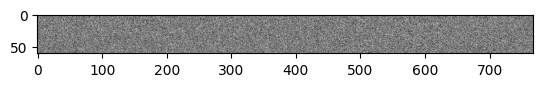

In [116]:
# Display the vector as matplotlib image
plt.imshow(myCrossModalityVector[0].numpy(), cmap='gray')

### This is What the attention masking currently looks like in the cross-encoder

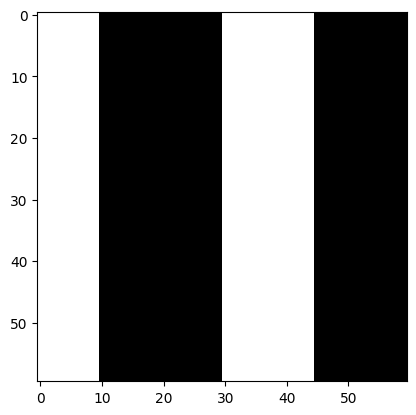

In [117]:
# Create the attention mask
myAttentionMask = torch.zeros(1, 60, 60)

# Set the attention mask to 1 for the first 30 tokens
myAttentionMask[:, :, 0:10] = 1
myAttentionMask[:, :, 30:45] = 1

# Display the attention mask as matplotlib image
plt.imshow(myAttentionMask[0].numpy(), cmap='gray')

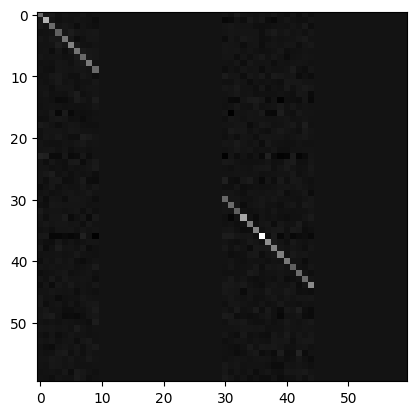

In [118]:
# So if we apply self-attention on our vector with this mask it will look like this:
# Perform self-attention on the vector
orig_attn = torch.matmul(myCrossModalityVector, myCrossModalityVector.transpose(-1, -2))

# Apply the attention mask
myAttention = orig_attn

# Normalize the attention scores
myAttention = myAttention / myAttention.sum(dim=-1).unsqueeze(-1) * myAttentionMask

x = myAttention[0].numpy()

# Display the attention as matplotlib image
plt.imshow(myAttention[0].numpy(), cmap='gray')

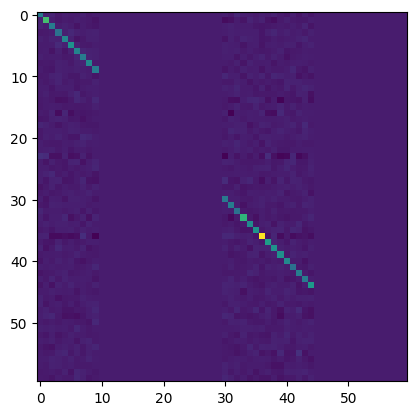

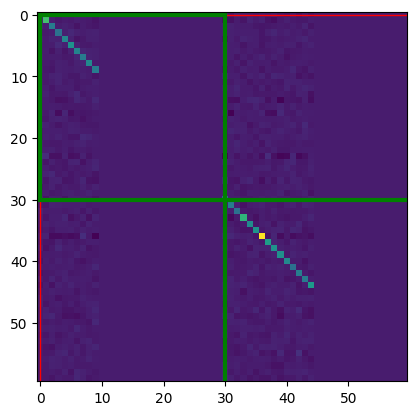

In [119]:
plt.imshow(x) 
  
# Create figure and axes 
fig, ax = plt.subplots(1) 
  
# Display the image 
ax.imshow(x) 
  
# Self-attention segments in red
self_attn = patches.Rectangle((30, 0), 30, 30, linewidth=1, 
                         edgecolor='r', facecolor ='none') 
  
ax.add_patch(self_attn) 
# Create a Rectangle patch 
self_attn = patches.Rectangle((0, 30), 30, 30, linewidth=1, 
                         edgecolor='r', facecolor ='none') 
  
ax.add_patch(self_attn) 
# Cross-attention segments in green
self_attn = patches.Rectangle((30, 30), 30, 30, linewidth=3, 
                         edgecolor='g', facecolor ='none') 
 
ax.add_patch(self_attn) 
# Create a Rectangle patch 
self_attn = patches.Rectangle((0, 0), 30, 30, linewidth=3, 
                         edgecolor='g', facecolor ='none') 
  
# Add the patch to the Axes 
ax.add_patch(self_attn) 
plt.show() 

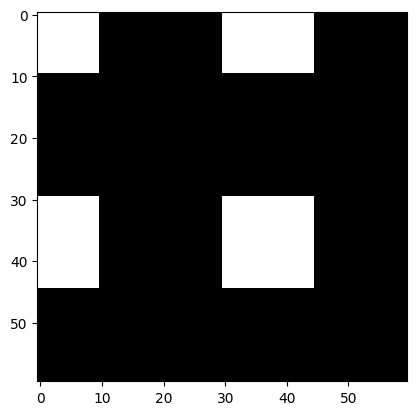

In [120]:
# """
# Given how currently the masking works (shown above) we can 
# see that the self-attention is not really masked.
# Also, the cross-attention areas are not properly masked as 
# well. For example we do not apply any masking on the y axis. 
# even though the same mask should be applied on the y-axis as well.
# """

# Set the attention mask to 1 for the first 30 tokens on y axis
myAttentionMask[:, 10:30, :] = 0
myAttentionMask[:, 45:,:] = 0
# Display the attention mask as matplotlib image
plt.imshow(myAttentionMask[0].numpy(), cmap='gray')

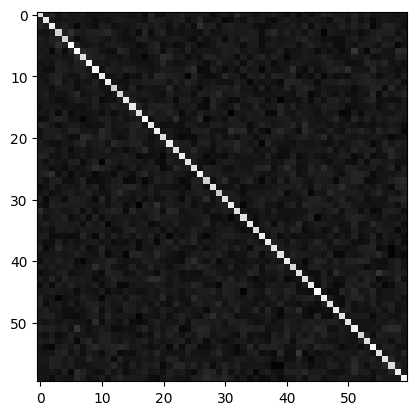

In [121]:
a = orig_attn[0].numpy()
a = a

# Display the attention as matplotlib image
plt.imshow(a, cmap='gray')

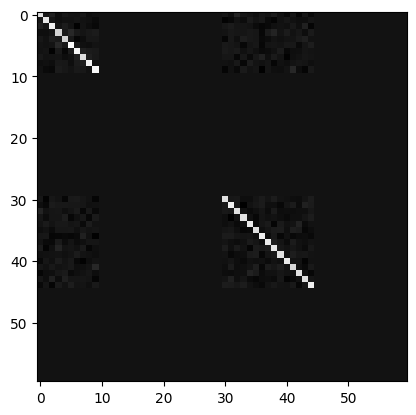

In [122]:
a = orig_attn[0].numpy()
a = a * myAttentionMask[0].numpy()

# Display the attention as matplotlib image
plt.imshow(a, cmap='gray')

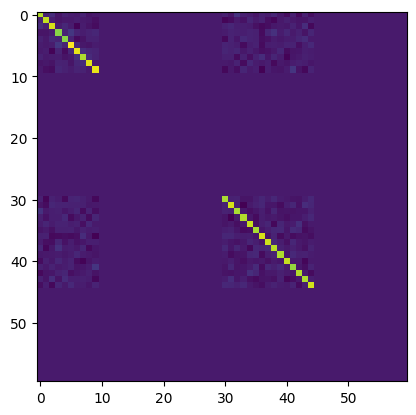

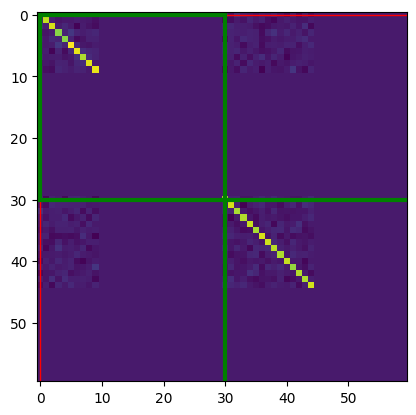

In [123]:
# The figure above shows which areas are masked. The red areas are 
# masked for self-attention and the green areas are masked 
# for cross-attention.

plt.imshow(a) 
  
# Create figure and axes 
fig, ax = plt.subplots(1) 
  
# Display the image 
ax.imshow(a) 
  
# Self-attention segments in red
self_attn = patches.Rectangle((30, 0), 30, 30, linewidth=1, 
                         edgecolor='r', facecolor ='none') 
  
ax.add_patch(self_attn) 
# Create a Rectangle patch 
self_attn = patches.Rectangle((0, 30), 30, 30, linewidth=1, 
                         edgecolor='r', facecolor ='none') 
  
ax.add_patch(self_attn) 
# Cross-attention segments in green
self_attn = patches.Rectangle((30, 30), 30, 30, linewidth=3, 
                         edgecolor='g', facecolor ='none') 
 
ax.add_patch(self_attn) 
# Create a Rectangle patch 
self_attn = patches.Rectangle((0, 0), 30, 30, linewidth=3, 
                         edgecolor='g', facecolor ='none') 
  
# Add the patch to the Axes 
ax.add_patch(self_attn) 
plt.show() 

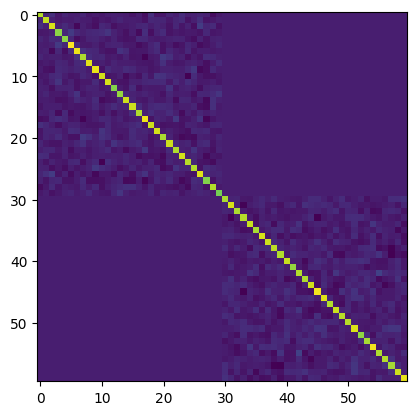

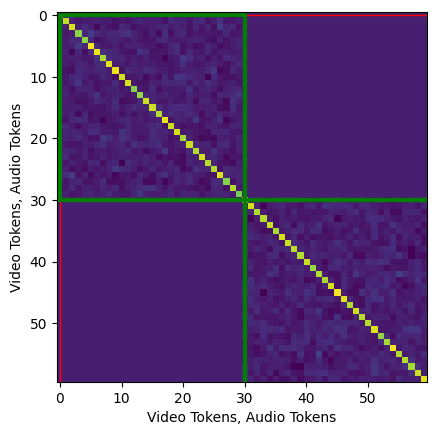

In [124]:
# I Propose dice masking, where we mask out also the parts where 
# only self attention can be performed as well as more attention 
# flow would be allowed between the two modalities.

a = orig_attn[0].numpy()
myAttentionMask = torch.ones(1, 60, 60)
myAttentionMask[:, 30:, :30] = 0
myAttentionMask[:, :30,30:] = 0
a = a * myAttentionMask[0].numpy()


plt.imshow(a) 
  
# Create figure and axes 
fig, ax = plt.subplots(1) 
  
# Display the image 
ax.imshow(a) 
  
# Self-attention segments in red
self_attn = patches.Rectangle((30, 0), 30, 30, linewidth=1, 
                         edgecolor='r', facecolor ='none') 
  
ax.add_patch(self_attn) 
# Create a Rectangle patch 
self_attn = patches.Rectangle((0, 30), 30, 30, linewidth=1, 
                         edgecolor='r', facecolor ='none') 
  
ax.add_patch(self_attn) 
# Cross-attention segments in green
self_attn = patches.Rectangle((30, 30), 30, 30, linewidth=3, 
                         edgecolor='g', facecolor ='none') 
 
ax.add_patch(self_attn) 
# Create a Rectangle patch 
self_attn = patches.Rectangle((0, 0), 30, 30, linewidth=3, 
                         edgecolor='g', facecolor ='none') 
plt.xlabel('Video Tokens, Audio Tokens')
plt.ylabel('Video Tokens, Audio Tokens')
  
# Add the patch to the Axes 
ax.add_patch(self_attn) 
plt.show() 

In [125]:
# """
# The reasoning behind this is that we do not want any self-
# attention influence from any modality since this should already 
# be performed in the modality encoder layers.

# We can also see that the cross-attention areas are properly 
# masked as well OR we can also leave this space open and allow 
# more attention flow between the two modalities.

# This is because of the reason which was proposed in the paper 
# attention-sinks for streaming transformers.

# In the step where we perform the matmul between the attention 
# scores and V we can make sure that the vector only computes 
# the cross-attention areas and not the self-attention areas.
# """

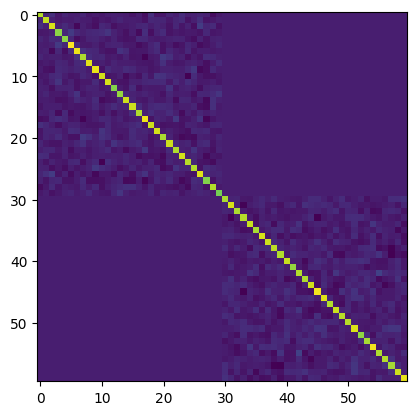

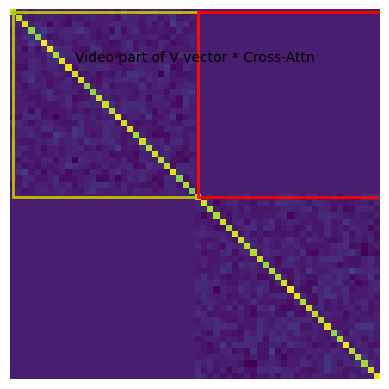

In [126]:
"""
I Propose dice masking, where we mask out also the parts where 
only self attention can be performed as well as more attention 
flow would be allowed between the two modalities."""

a = orig_attn[0].numpy()
myAttentionMask = torch.ones(1, 60, 60)
myAttentionMask[:, 30:, :30] = 0
myAttentionMask[:, :30,30:] = 0
a = a * myAttentionMask[0].numpy()


plt.imshow(a) 
  
# Create figure and axes 
fig, ax = plt.subplots(1) 
  
# Display the image 
ax.imshow(a) 

plt.xlabel('Video Tokens, Audio Tokens')
plt.ylabel('Video Tokens, Audio Tokens')

# Create a Rectangle patch 
self_attn = patches.Rectangle((0, 0), 30, 30, linewidth=2, 
                         edgecolor='y', facecolor ='none') 
  
# Add the patch to the Axes 
ax.add_patch(self_attn) 

# Create a Rectangle patch 
self_attn = patches.Rectangle((30, 0), 30, 30, linewidth=2, 
                         edgecolor='r', facecolor ='none') 
ax.text( y=8, x=10,s="Video part of V vector * Cross-Attn") #whatever text arguments
ax.axis('off')
# Add the patch to the Axes 
ax.add_patch(self_attn) 
plt.show() 

In [127]:
# In this way we can make sure that there will not be any self-attention 
# influence in the cross-attention areas which is important since we 
# do not want any self-attention influence from any modality since this 
# should already be performed in the modality encoder layers.
